In [5]:
import random
import numpy as np
class kmeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters=n_clusters
        self.max_iter=max_iter
        self.centroid=None
        
    def fit_predict(self,X):
        random_int=random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroid=X[random_int]
        
        for i in range(self.max_iter):
            cluster_group=self.assign_clusters(X)
            old_centroid=self.centroid
            #move centroid
            self.centroid=self.move_centroid(X,cluster_group)
            #check finish
            if (old_centroid == self.centroid).all(): 
                break
        return cluster_group
    
    def assign_clusters(self,X):
        cluster_group=[]
        distances=[]
        
        for row in X:
            for centroid in self.centroid:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance=min(distances)
            index_pos=distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()
        return np.array(cluster_group)
    
    def move_centroid(self,X,cluster_group):
        new_centroid=[]
        cluster_type=np.unique(cluster_group)
        
        for type in cluster_type:
            new_centroid.append(X[cluster_group==type].mean(axis=0))
                
        return np.array(new_centroid)    

In [6]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt                     


In [7]:
centroids=[(-5,-5),(5,5),(10,10),(-10,-10)]
cluster_std=[1,1,1,1]
X, y = make_blobs(n_samples=1000,cluster_std=cluster_std, centers=centroids,n_features=2, random_state=42)
km=kmeans(n_clusters=4,max_iter=100)
y_means=km.fit_predict(X)

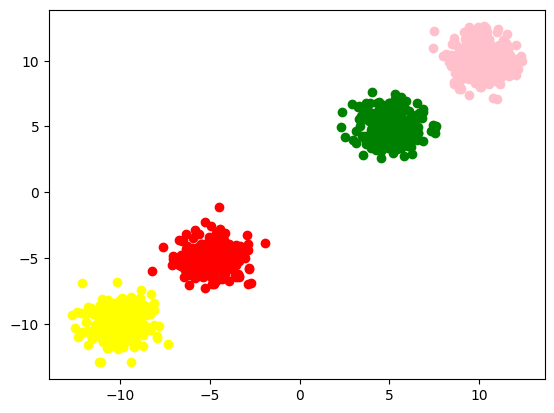

In [ ]:
# visualization
plt.scatter(X[y_means==0,0],X[y_means==0,1],color='red')
plt.scatter(X[y_means==1,0],X[y_means==1,1],color='yellow')
plt.scatter(X[y_means==2,0],X[y_means==2,1],color='green')
plt.scatter(X[y_means==3,0],X[y_means==3,1],color='pink')